Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle
import warnings

Reading the csv file

In [ ]:
data=pd.read_csv("loandata.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Displaying the data information


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Visualizing the data
#### Plotting the Loan Status i.e how much applicants are granted for loan

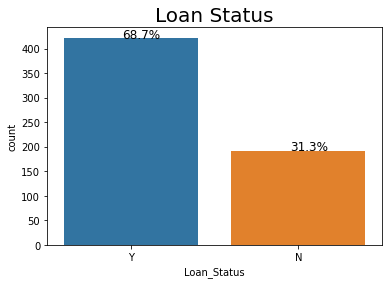

In [ ]:
def show_percent_bars(ax,feature):
  total=len(feature)
  for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
        
ax = sns.countplot(data=data, x='Loan_Status')
ax.set_title("Loan Status", fontsize=20)
show_percent_bars(ax, data.Loan_Status)

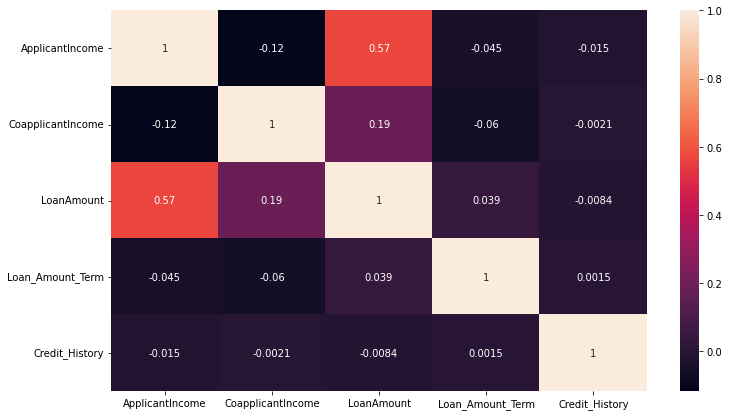

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True)

Text(0, 0.5, 'Loan Status count')

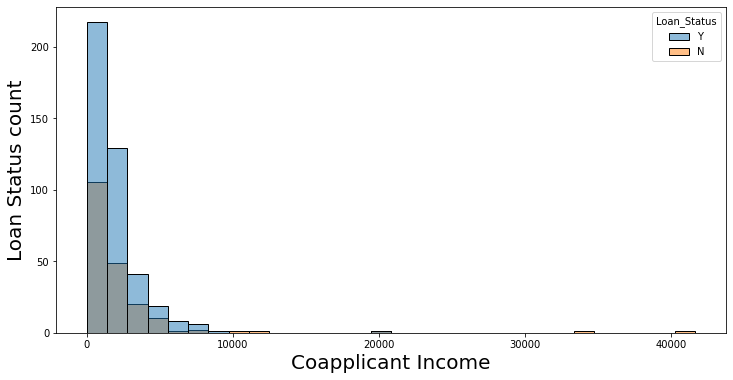

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='CoapplicantIncome', hue='Loan_Status', bins=30)
plt.xlabel("Coapplicant Income", fontsize=20)
plt.ylabel("Loan Status count",fontsize=20)



Plotting Histogram between Application Income vs Loan Status

Text(0, 0.5, 'Loan Status count')

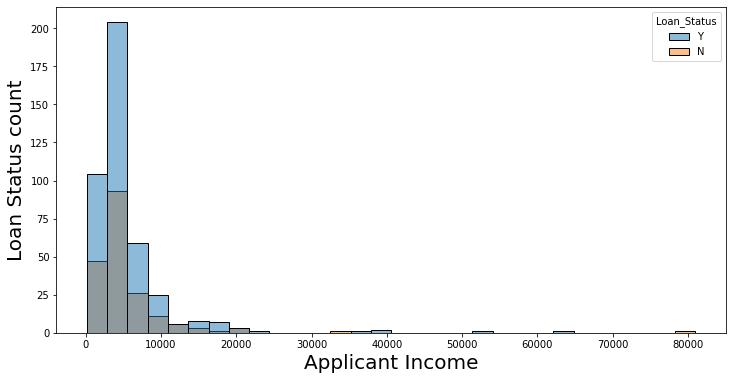

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='ApplicantIncome', hue='Loan_Status', bins=30)
plt.xlabel("Applicant Income", fontsize=20)
plt.ylabel("Loan Status count",fontsize=20)

Text(0, 0.5, 'Loan Status count')

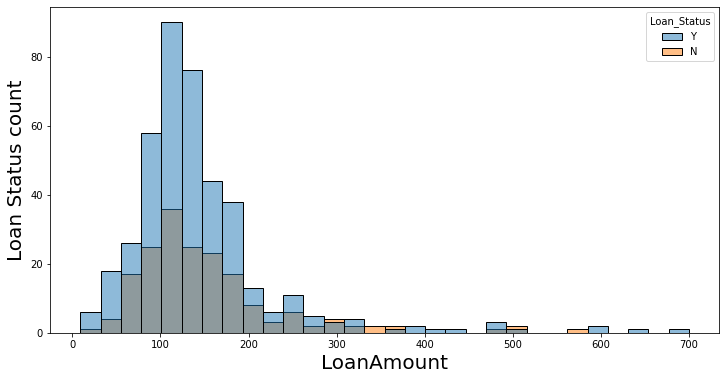

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='LoanAmount', hue='Loan_Status', bins=30)
plt.xlabel("LoanAmount", fontsize=20)
plt.ylabel("Loan Status count",fontsize=20)

Plotting the subplots between independent and dependent variables

Text(0.5, 1.0, 'Dependents')

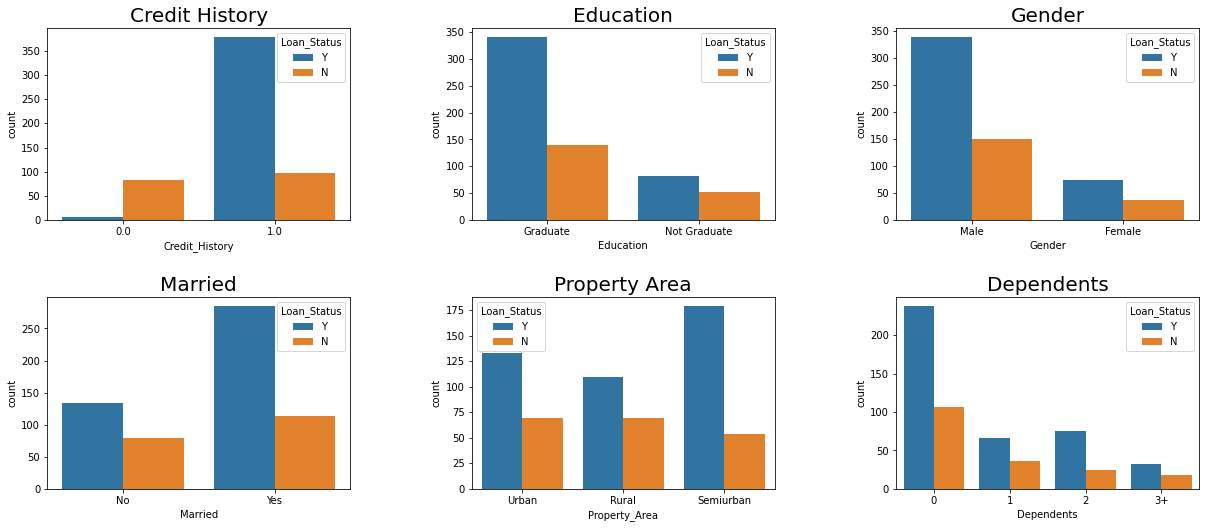

In [ ]:
# making subplots
fig, axes = plt.subplots(2, 3, figsize=(20,8))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes[0,0].set_title('Credit History', fontsize=20)
sns.countplot(ax=axes[0,0], data=data, x='Credit_History', hue='Loan_Status')

sns.countplot(ax=axes[0,1], data=data, x='Education', hue='Loan_Status')
axes[0,1].set_title("Education", fontsize=20)

sns.countplot(ax=axes[0,2], data=data, x='Gender',hue='Loan_Status')
axes[0,2].set_title("Gender", fontsize=20)



sns.countplot(ax=axes[1,0], data=data, x='Married',hue='Loan_Status')
axes[1,0].set_title("Married", fontsize=20)


sns.countplot(ax=axes[1,1], data=data, x='Property_Area', hue='Loan_Status')
axes[1,1].set_title("Property Area", fontsize=20)

sns.countplot(ax=axes[1,2], data=data, x='Dependents', hue='Loan_Status')
axes[1,2].set_title("Dependents", fontsize=20)

Data Prepocessing Steps


1.Checking for null values

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Seperating the numerical and categorial columns

In [ ]:
num_cols=[]
cat_cols=[]
for col in data.columns:
  if data[col].dtype==object:
    cat_cols.append(col)
  else:
    num_cols.append(col)

print("Numerical cols:",num_cols)
print("Categorial cols:",cat_cols)


Numerical cols: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorial cols: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [ ]:
df_num = data[num_cols]
df_cat = data[cat_cols]

In [ ]:
df_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [ ]:
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


Filling null values with most frequent value used in dataset.

In [ ]:
df_cat = df_cat.apply(lambda x:x.fillna(x.value_counts().index[0]))


Checking for null values after replace null values with frequent values.

In [ ]:
df_cat.isnull().sum().any()

False

fill every missing value with their previous value in the same column

In [ ]:
df_num.fillna(method='bfill', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
df_num.isnull().sum().any()

False

Finding the unique Values

In [ ]:
df_cat[cat_cols].nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

Dropping the Loan ID column

In [ ]:
df_cat.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
cat_cols.remove('Loan_ID')

Replacing the categorial values with integer values as(0 or 1) using ordinal_encoder

In [ ]:
ordinal_encoder = OrdinalEncoder()
df_cat[cat_cols] = ordinal_encoder.fit_transform(df_cat[cat_cols])

In [ ]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,2.0,1.0


Concating the numerical and categorial columns

In [ ]:
df = pd.concat([df_cat, df_num], axis=1)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,5849,0.0,128.0,360.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0
2,1.0,1.0,0.0,0.0,1.0,2.0,1.0,3000,0.0,66.0,360.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2.0,1.0,2583,2358.0,120.0,360.0,1.0
4,1.0,0.0,0.0,0.0,0.0,2.0,1.0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2900,0.0,71.0,360.0,1.0
610,1.0,1.0,3.0,0.0,0.0,0.0,1.0,4106,0.0,40.0,180.0,1.0
611,1.0,1.0,1.0,0.0,0.0,2.0,1.0,8072,240.0,253.0,360.0,1.0
612,1.0,1.0,2.0,0.0,0.0,2.0,1.0,7583,0.0,187.0,360.0,1.0


Splitting data into dependent and independent variables

In [ ]:
df_selected_rows=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History', 'Property_Area', 'Married', 'Education', 'Dependents']
X=df[df_selected_rows]
Y=df['Loan_Status']

Splitting the dataset into train and test datset

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,random_state=0)

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled=SMOTE().fit_resample(X,Y)
X, y=SMOTE().fit_resample(X,Y)

In [ ]:
y.value_counts().to_frame().T

,1.0,0.0
Loan_Status,422,422


Training the model 

Fitting the model by using Random Forest Regression

---



In [ ]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
ypred=model.predict(xtest)

In [ ]:
 tr=model.score(xtrain,ytrain)
 te=model.score(xtest,ytest)
 print(f"Training Accuracy: {tr}\n\nTesting Accuracy: {te}\n")
 Acc=accuracy_score(ypred,ytest)
 print("Accuracy: {:2f}%".format(Acc*100))
    

Training Accuracy: 1.0

Testing Accuracy: 0.7945945945945946

Accuracy: 79.459459%


In [ ]:
 print("\nClassification Report :\n ",classification_report(ytest,ypred))


Classification Report :
                precision    recall  f1-score   support

         0.0       0.70      0.45      0.55        51
         1.0       0.82      0.93      0.87       134

    accuracy                           0.79       185
   macro avg       0.76      0.69      0.71       185
weighted avg       0.78      0.79      0.78       185



In [ ]:
pickle.dump(model,open('loanpredict.pkl','wb'))

In [ ]:
loan=pickle.load(open('loanpredict.pkl','rb'))